In [124]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from keras.layers import Conv2D, Conv1D, MaxPooling2D, MaxPooling1D, Flatten, BatchNormalization, Dense
from keras.utils import to_categorical
from keras.models import Sequential
from keras.callbacks import CSVLogger, ModelCheckpoint
import matplotlib.pyplot as plt

In [125]:
data_train = pd.read_csv("C:/Users/Dareen/OneDrive/Desktop/ecg/archive (19)/mitbih_train.csv",header=None)
data_test = pd.read_csv("C:/Users/Dareen/OneDrive/Desktop/ecg/archive (19)/mitbih_test.csv",header=None)
normal= pd.read_csv("C:/Users/Dareen/OneDrive/Desktop/ecg/archive (19)/ptbdb_normal.csv",header=None)
abnormal= pd.read_csv("C:/Users/Dareen/OneDrive/Desktop/ecg/archive (19)/ptbdb_abnormal.csv",header=None)

In [126]:
data_train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [127]:
normal.tail()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
4041,1.000000,0.929586,0.503550,0.293491,0.169822,0.159763,0.130769,0.125444,0.137278,0.111243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4042,1.000000,0.637579,0.154837,0.061983,0.088965,0.083374,0.065143,0.057365,0.060039,0.060039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4043,1.000000,0.872574,0.465071,0.232212,0.126132,0.155886,0.174644,0.190168,0.203752,0.168823,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4044,0.915983,0.529373,0.288406,0.144536,0.171802,0.180669,0.177566,0.176458,0.178896,0.180448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4045,1.000000,0.838643,0.390567,0.191146,0.033513,0.055854,0.129086,0.147290,0.155151,0.165494,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [131]:
normal[187].unique()

array([0.])

In [130]:
data_train[187].unique()
# we have 5 classes 

array([0., 1., 2., 3., 4.])

In [82]:
normal = normal.drop([187], axis=1)
abnormal = abnormal.drop([187], axis=1)

In [83]:
data_train.isnull().sum().to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [84]:
abnormal.shape, normal.shape

((10506, 187), (4046, 187))

C:\Users\Dareen\AppData\Local\Temp\ipykernel_39600\1528715984.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 5, 1)


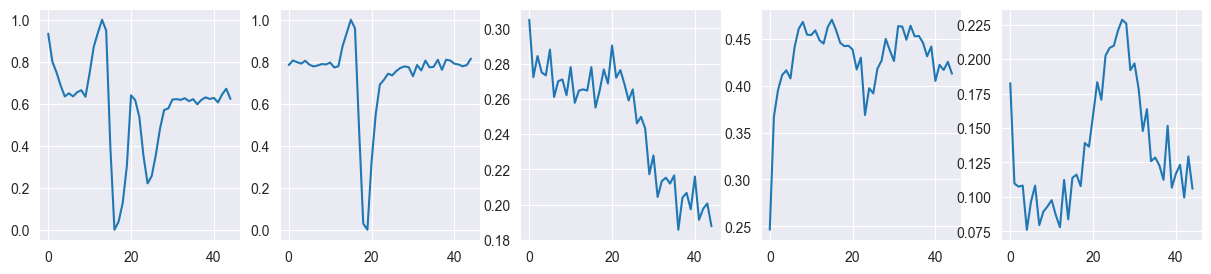

In [85]:
plt.figure(figsize=(15, 3))
plt.title('ECG Visualization of Abormal Persons')
plt.subplot(1, 5, 1)
plt.plot(abnormal.values[0][5:50])
plt.subplot(1, 5, 2)
plt.plot(abnormal.values[10][5:50])
plt.subplot(1, 5, 3)
plt.plot(abnormal.values[20][5:50])
plt.subplot(1, 5, 4)
plt.plot(abnormal.values[40][5:50])
plt.subplot(1, 5, 5)
plt.plot(abnormal.values[44][5:50])

C:\Users\Dareen\AppData\Local\Temp\ipykernel_39600\2701466339.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 5, 1)


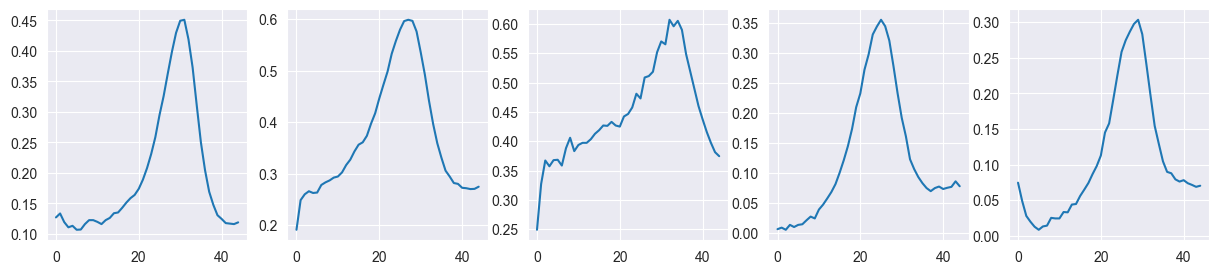

In [86]:
plt.figure(figsize=(15, 3))
plt.title('ECG Visualization of Normal Persons')
plt.subplot(1, 5, 1)
plt.plot(normal.values[0][5:50])
plt.subplot(1, 5, 2)
plt.plot(normal.values[10][5:50])
plt.subplot(1, 5, 3)
plt.plot(normal.values[20][5:50])
plt.subplot(1, 5, 4)
plt.plot(normal.values[40][5:50])
plt.subplot(1, 5, 5)
plt.plot(normal.values[77][5:50])

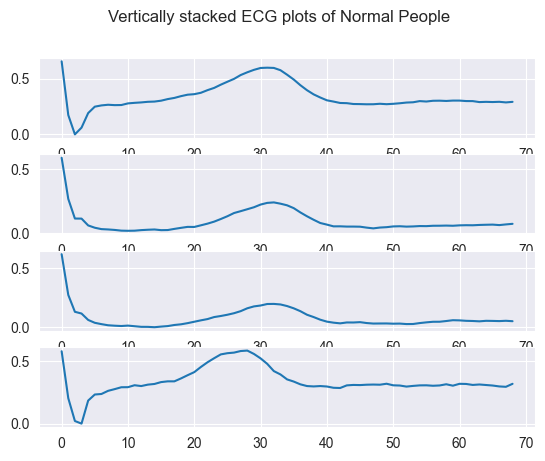

In [87]:
fig, axs = plt.subplots(4)
fig.suptitle('Vertically stacked ECG plots of Normal People')
axs[0].plot(normal.values[10][1:70])
axs[1].plot(normal.values[55][1:70])
axs[2].plot(normal.values[87][1:70])
axs[3].plot(normal.values[98][1:70])

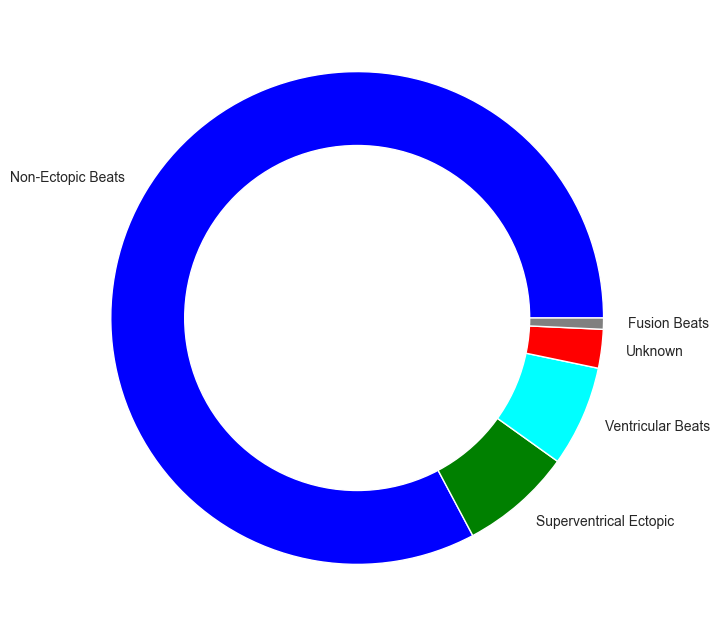

In [88]:
plt.figure(figsize=(10, 8))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(data_train[187].value_counts(), labels=['Non-Ectopic Beats', 'Superventrical Ectopic', 'Ventricular Beats',
                                                'Unknown', 'Fusion Beats'], colors=['blue', 'green', 'cyan', 
                                                                                   'red', 'grey'])
p = plt.gcf()
p.gca().add_artist(circle)

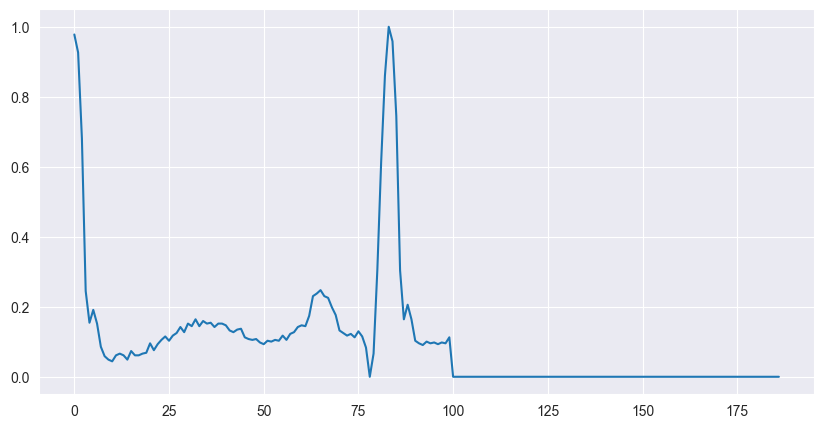

In [89]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
plt.plot(data_train.iloc[0, 0:187])

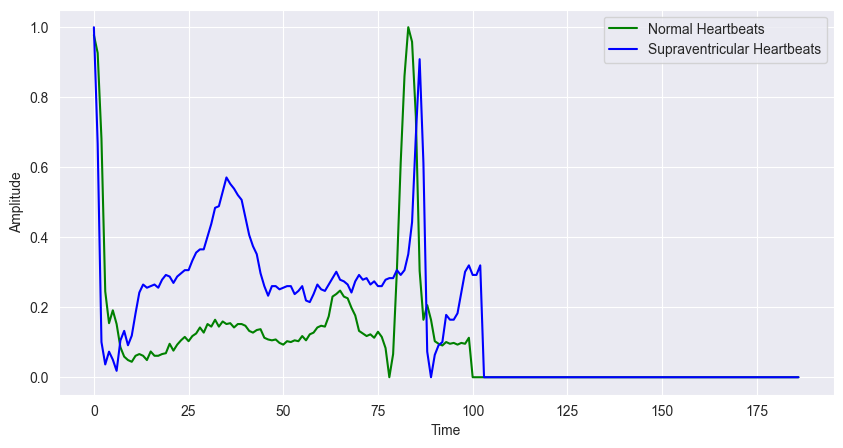

In [90]:
data_1 = data_train[data_train[187] == 1]
data_2 = data_train[data_train[187] == 2]
data_3 = data_train[data_train[187] == 3]
data_4 = data_train[data_train[187] == 4]

sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
plt.plot(data_train.iloc[0, 0:187], color='green', label='Normal Heartbeats')
plt.plot(data_1.iloc[0, 0:187], color='blue', label='Supraventricular Heartbeats')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

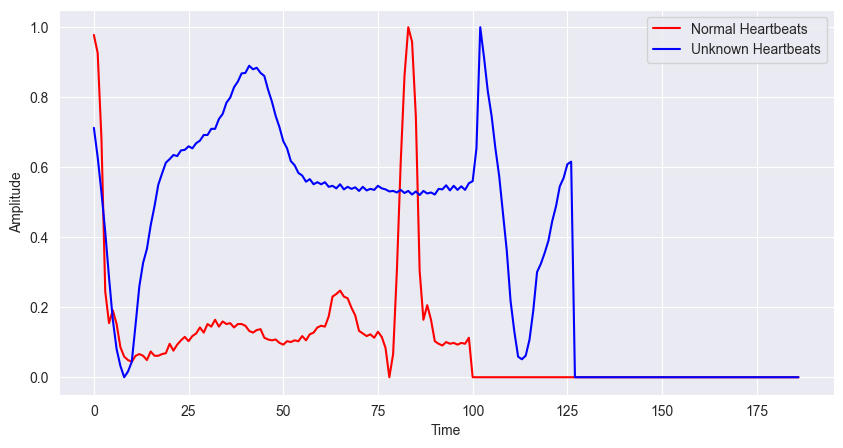

In [132]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
plt.plot(data_train.iloc[0, 0:187], color='red', label='Normal Heartbeats')
plt.plot(data_4.iloc[0, 0:187], color='blue', label='Unknown Heartbeats')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

In [92]:
y_abnormal = np.ones(abnormal.shape[0])
y_abnormal = pd.DataFrame(y_abnormal)

y_normal = np.zeros(normal.shape[0])
y_normal = pd.DataFrame(y_normal)

X = pd.concat([abnormal, normal], sort=True)
y = pd.concat([y_abnormal, y_normal], sort=True)

In [93]:
from sklearn.utils import resample
data_1_resample = resample(data_1, n_samples=20000, 
                           random_state=123, replace=True)
data_2_resample = resample(data_2, n_samples=20000, 
                           random_state=123, replace=True)
data_3_resample = resample(data_3, n_samples=20000, 
                           random_state=123, replace=True)
data_4_resample = resample(data_4, n_samples=20000, 
                           random_state=123, replace=True)
data_0 = data_train[data_train[187] == 0].sample(n=20000, random_state=123)

In [94]:
train_dataset = pd.concat([data_0, data_1_resample, data_2_resample, data_3_resample, 
                          data_4_resample])

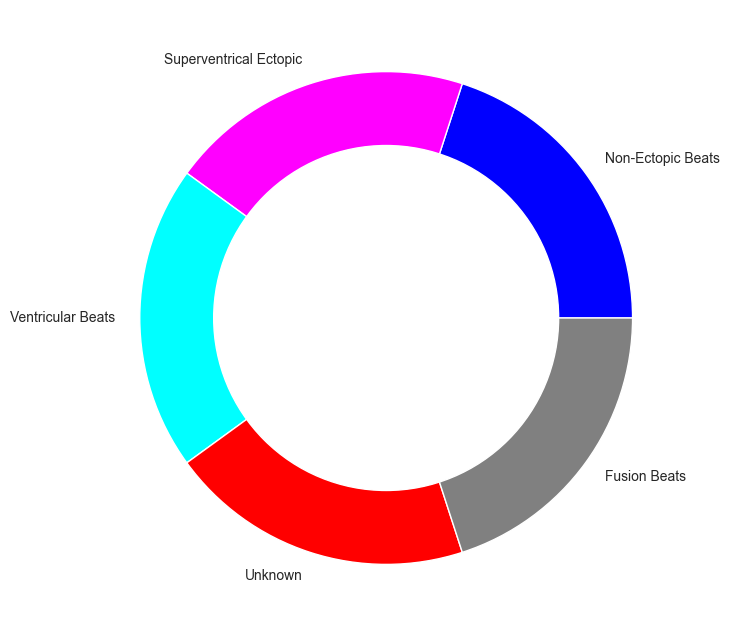

In [95]:
plt.figure(figsize=(10, 8))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(train_dataset[187].value_counts(), labels=['Non-Ectopic Beats', 'Superventrical Ectopic', 'Ventricular Beats',
                                                'Unknown', 'Fusion Beats'], colors=['blue', 'magenta', 'cyan', 
                                                                                   'red', 'grey'])
p = plt.gcf()
p.gca().add_artist(circle)

In [96]:
target_train = train_dataset[187]
target_test = data_test[187]
target_train.unique()

array([0., 1., 2., 3., 4.])

In [97]:
X_train = train_dataset.iloc[:, :-1].values
X_test = data_test.iloc[:, :-1].values

In [98]:
y_train = to_categorical(target_train)
y_test = to_categorical(target_test)
y_train[:4]

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [99]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(100000, 187)
(21892, 187)
(100000, 5)
(21892, 5)


In [100]:
X_train = X_train.reshape(len(X_train), X_train.shape[1], 1)
X_test = X_test.reshape(len(X_test), X_test.shape[1], 1)
X_train.shape, X_test.shape

((100000, 187, 1), (21892, 187, 1))

In [101]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=6, activation='relu', 
                    padding='same', input_shape=(187, 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))
    
model.add(Conv1D(filters=64, kernel_size=6, activation='relu', 
                    padding='same', input_shape=(187, 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))
    
model.add(Conv1D(filters=64, kernel_size=6, activation='relu', 
                    padding='same', input_shape=(187, 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))
    
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))
    

c:\Users\Dareen\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [102]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [103]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)               │ (None, 187, 64)        │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 187, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 94, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 94, 64)         │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 94, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 47, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 47, 64)         │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 47, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_8 (MaxPooling1D)  │ (None, 24, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1536)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 512)            │       786,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 911,685 (3.48 MB)

 Trainable params: 911,301 (3.48 MB)

 Non-trainable params: 384 (1.50 KB)

In [104]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,        
    restore_best_weights=True  
)

In [105]:
his = model.fit(X_train, y_train, epochs=50, batch_size=32, 
          validation_data=(X_test, y_test),callbacks=[early_stopping],verbose=1)

Epoch 1/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 45s 14ms/step - accuracy: 0.8942 - loss: 0.2963 - val_accuracy: 0.9515 - val_loss: 0.1520
Epoch 2/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.9732 - loss: 0.0802 - val_accuracy: 0.9614 - val_loss: 0.1234
Epoch 3/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - accuracy: 0.9829 - loss: 0.0525 - val_accuracy: 0.9670 - val_loss: 0.1220
Epoch 4/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - accuracy: 0.9884 - loss: 0.0376 - val_accuracy: 0.9710 - val_loss: 0.1139
Epoch 5/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.9914 - loss: 0.0303 - val_accuracy: 0.9671 - val_loss: 0.1287
Epoch 6/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.9932 - loss: 0.0233 - val_accuracy: 0.9746 - val_loss: 0.1293
Epoch 7/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 45s 14ms/step - accuracy: 0.9936 - loss: 0.0229 - val_accuracy: 0.9763 - val_loss: 0.1204
Epoch 8/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 43s 14ms/step - accuracy: 0.9951 -

In [106]:
from tensorflow.keras.layers import Dense, Dropout
model2 = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')  
])
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

c:\Users\Dareen\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [107]:
history = model2.fit(X_train, y_train, epochs=50, batch_size=32,validation_data=(X_test, y_test),callbacks=[early_stopping], verbose=1)

Epoch 1/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7760 - loss: 0.5974 - val_accuracy: 0.8646 - val_loss: 0.3601
Epoch 2/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8912 - loss: 0.2920 - val_accuracy: 0.9107 - val_loss: 0.2388
Epoch 3/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9129 - loss: 0.2358 - val_accuracy: 0.8400 - val_loss: 0.3762
Epoch 4/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9251 - loss: 0.1988 - val_accuracy: 0.9074 - val_loss: 0.2538
Epoch 5/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9343 - loss: 0.1756 - val_accuracy: 0.9243 - val_loss: 0.2199


In [108]:
model2.evaluate(X_test, y_test)

685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8551 - loss: 0.3851


[0.3601188063621521, 0.8645623922348022]

In [109]:
history = his.history
history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

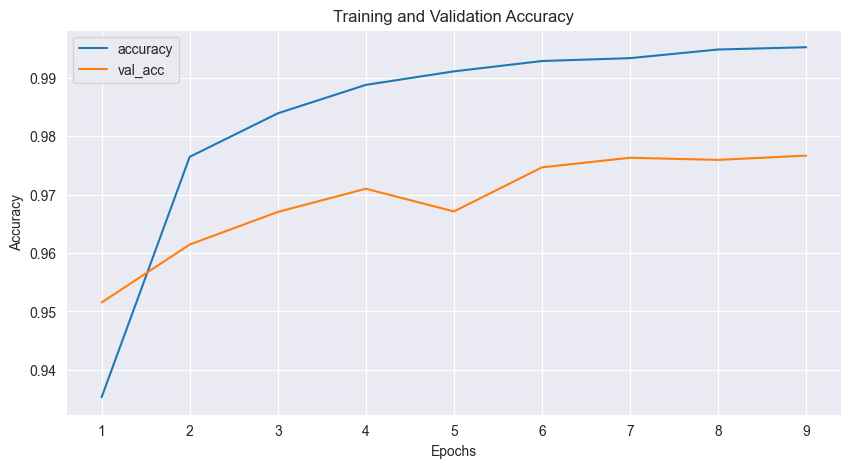

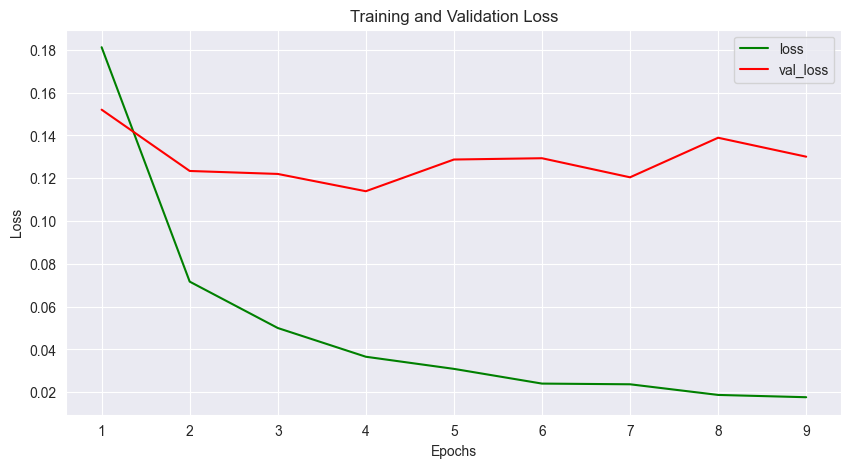

In [110]:
epochs = range(1, len(history['loss']) + 1)
acc = history['accuracy']
loss = history['loss']
val_acc = history['val_accuracy']
val_loss = history['val_loss']

plt.figure(figsize=(10, 5))
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, label='accuracy')
plt.plot(epochs, val_acc, label='val_acc')
plt.legend()

plt.figure(figsize=(10, 5))
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(epochs, loss, label='loss', color='g')
plt.plot(epochs, val_loss, label='val_loss', color='r')
plt.legend()

In [116]:

if len(X_train.shape) > 2:
    X_train = X_train.reshape(X_train.shape[0], -1)
    X_test = X_test.reshape(X_test.shape[0], -1)
    
if len(y_train.shape) > 1:
    y_train = np.argmax(y_train, axis=1)
    y_test = np.argmax(y_test, axis=1)
    
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)

SVC()

In [117]:
pred = svc.predict(X_test)
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     16420
           1       0.82      0.35      0.49      1315
           2       0.92      0.84      0.88      1573
           3       0.93      0.16      0.28       913
           4       0.98      0.94      0.96      1671

    accuracy                           0.90     21892
   macro avg       0.91      0.66      0.71     21892
weighted avg       0.90      0.90      0.88     21892



In [119]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [120]:
pred2 = knn.predict(X_test)
print(classification_report(pred2,y_test))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     17368
           1       0.81      0.50      0.62       915
           2       0.95      0.81      0.87      1692
           3       0.81      0.51      0.63       258
           4       0.98      0.95      0.96      1659

    accuracy                           0.95     21892
   macro avg       0.90      0.75      0.81     21892
weighted avg       0.95      0.95      0.94     21892



In [121]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2] 
}


grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)


best_knn = grid_search.best_estimator_
test_score = best_knn.score(X_test, y_test)
print(f"Test set accuracy: {test_score:.4f}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters found:  {'metric': 'manhattan', 'n_neighbors': 3, 'p': 1}
Test set accuracy: 0.9518


In [122]:
print(classification_report(grid_search.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     17436
           1       0.82      0.52      0.63       878
           2       0.95      0.82      0.88      1677
           3       0.78      0.51      0.61       249
           4       0.98      0.95      0.97      1652

    accuracy                           0.95     21892
   macro avg       0.90      0.76      0.81     21892
weighted avg       0.95      0.95      0.95     21892

